In [1]:
from abel import HALHFv1, HALHFv2, Collider
from abel.classes.collider.preset.c3 import C3
import numpy as np
%load_ext autoreload
%autoreload 2

## HALHF version 1.0 (original paper)

In [7]:
halhf1 = HALHFv1()
halhf1.run('preset_example_HALHF1', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.1 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  1.0%, ε = 158.9/0.6 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  222.9 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #2  StageBasic #1           (s =  227.8 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #3  InterstageBasic         (s =  236.3 m) :   E =  36.2 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #4  StageBasic #2           (s =  241.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #5  InterstageBasic         (s =  253.1 m) :   E =  67.5 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #6  StageBasic #3           (s =  258.0 m) :   E =  98.7 GeV, Q = -1.60 nC, σz =  17.8 µm, σE =  0.0%, ε = 158.9/0.6 mm-mrad
    ... #7  InterstageBasic         (s =  272.7 m) :   E 

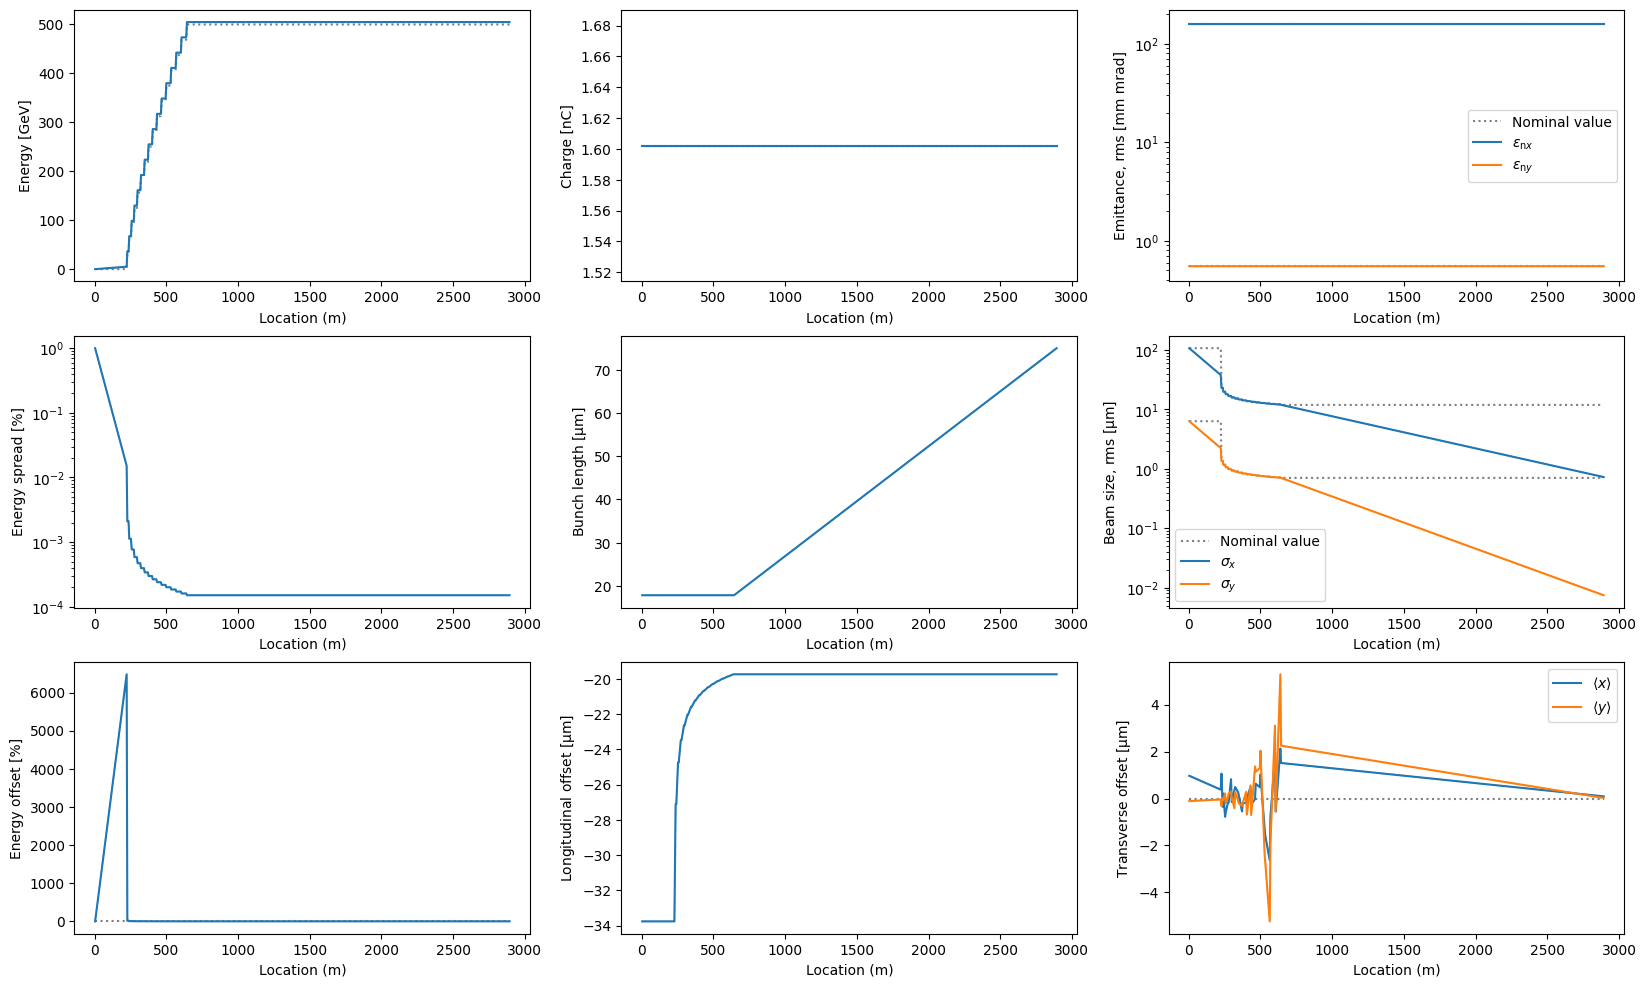

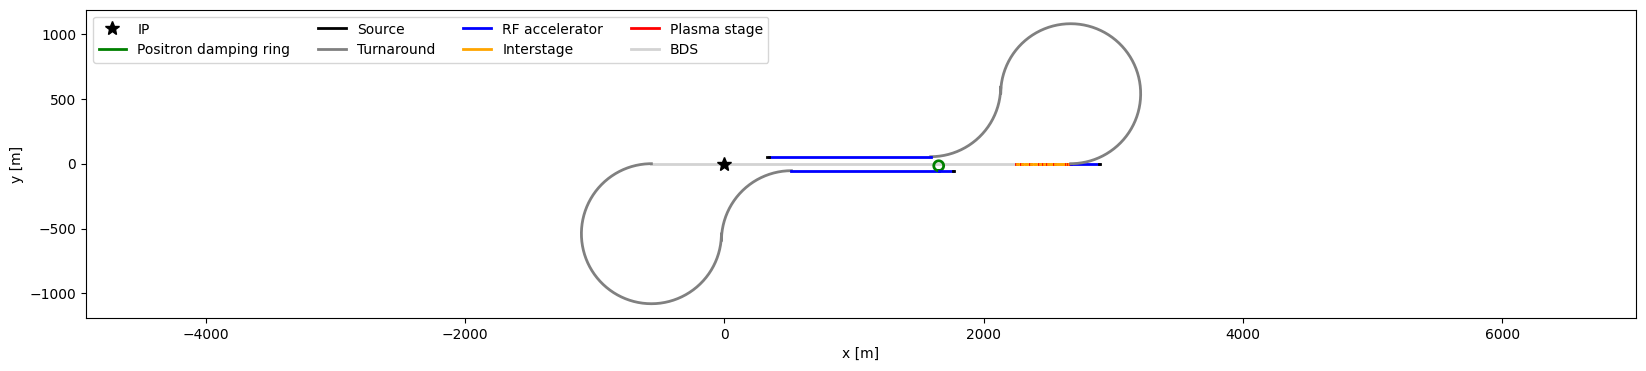

In [8]:
halhf1.linac1.plot_evolution()
halhf1.plot_survey()

In [4]:
halhf1.print_cost()

-- COSTS -----------------------------------------
-- Construction: 3796 MILCU
   -- Electron arm (plasma): 2506 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 81 MILCU
         -- Instrumented beamline (29%): 3 MILCU
         -- RF structures (312x): 18 MILCU
         -- Klystrons (313x, 3 MW peak, 4 kW avg): 60 MILCU
      -- Driver complex: 2009 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 1563 MILCU
            -- Instrumented beamline (29%): 15 MILCU
            -- RF structures (1178x): 102 MILCU
            -- Klystrons (1179x, 28 MW peak, 40 kW avg): 1447 MILCU
         -- Turnaround: 94 MILCU
         -- Civil construction: 302 MILCU
      -- Plasma stages (16x): 23 MILCU
      -- Interstages: 33 MILCU
      -- BDS: 91 MILCU
      -- Civil construction: 174 MILCU
   -- Positron arm (RF): 1106 MILCU
      -- Source: 50 MILCU
      -- RF injector: 52 MILCU
         -- Instrumented beamline (29%): 1 MILCU
         -- RF structures (159x

## HALHF version 2.0 (baseline update)

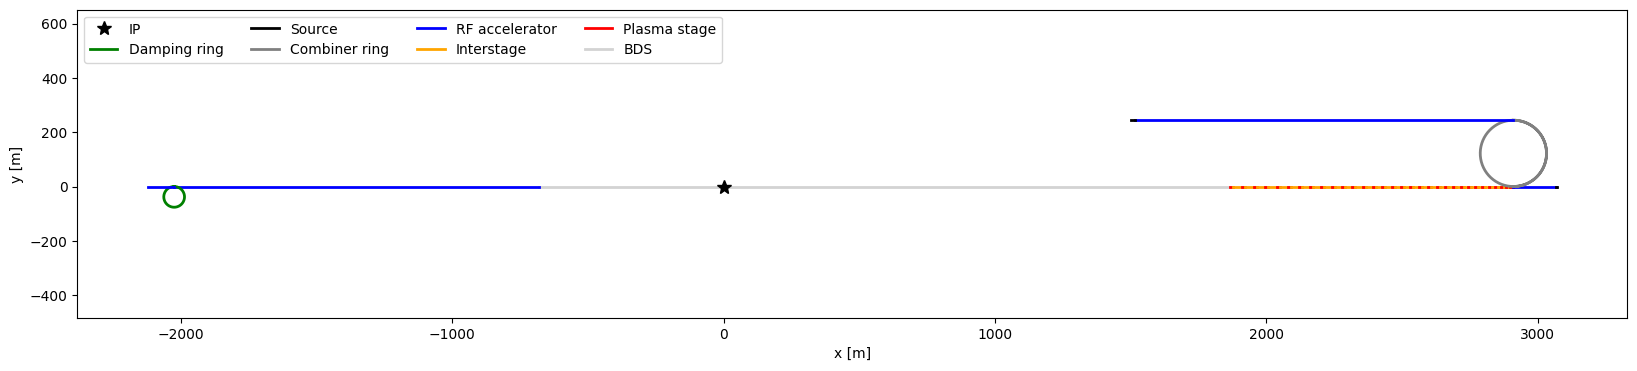

-- COSTS -----------------------------------------
-- Construction: 2342 MILCU
   -- Plasma linac: 1231 MILCU
      -- Polarized electron source: 96 MILCU
      -- RF injector: 46 MILCU
         -- Instrumented beamline (10%): 1 MILCU
         -- RF structures (5631x): 16 MILCU
         -- Klystrons (27x, 41 MW peak, 30 kW avg): 29 MILCU
      -- Driver complex: 698 MILCU
         -- Source: 50 MILCU
         -- RF accelerator: 498 MILCU
            -- Instrumented beamline (25%): 14 MILCU
            -- RF structures (454x): 120 MILCU
            -- Klystrons (455x, 28 MW peak, 60 kW avg): 364 MILCU
         -- Combiner ring: 19 MILCU
         -- Civil construction: 130 MILCU
      -- Plasma stages (32x): 65 MILCU
      -- Interstages: 67 MILCU
      -- BDS: 75 MILCU
      -- Civil construction: 184 MILCU
   -- RF linac: 928 MILCU
      -- Polarized positron source: 192 MILCU
      -- RF injector: 34 MILCU
         -- Instrumented beamline (10%): 0 MILCU
         -- RF structures (343

SyntaxError: 'return' outside function (676760829.py, line 7)

In [11]:
halhf2 = HALHFv2()
halhf2.com_energy = 250e9
halhf2.run('preset_example_HALHF2', overwrite=True, verbose=False)
halhf2.plot_survey()
halhf2.print_cost()
halhf2.print_power()
return

In [ ]:
halhf2.linac1.driver_complex.rf_accelerator.plot_power_profile()
halhf2.linac1.driver_complex.rf_accelerator.plot_gradient_profile()

In [ ]:
halhf2 = HALHFv2()
halhf2.com_energy = 550e9
best_parameters, best_values = halhf2.optimize('halhf2_optimization_cold', 
                    parameters=[
                        {'name': 'energy_asymmetry', 'type': 'range', 'bounds': [2.0, 4.0], 'value_type': 'float', 'log_scale': True}, 
                        {'name': 'num_bunches_in_train', 'type': 'range', 'value_type': 'int', 'bounds': [100, 200], 'log_scale': True},
                        #{'name': 'rep_rate_trains', 'type': 'range', 'value_type': 'float', 'bounds': [50, 200], 'log_scale': True},
                        #{'name': 'combiner_ring_compression_factor', 'type': 'range', 'value_type': 'int', 'bounds': [2, 5]},
                        {'name': 'driver_separation_num_buckets', 'type': 'range', 'value_type': 'int', 'bounds': [2, 7]},
                        {'name': 'driver_linac_num_structures_per_klystron', 'type': 'range', 'value_type': 'float', 'bounds': [0.5, 2.0], 'log_scale': True},
                        {'name': 'driver_linac_gradient', 'type': 'range', 'value_type': 'float', 'bounds': [1e6, 8e6], 'log_scale': True},
                        {'name': 'positron_linac_gradient', 'type': 'range', 'value_type': 'float', 'bounds': [15e6, 60e6], 'log_scale': True},
                        {'name': 'positron_linac_num_structures_per_klystron', 'type': 'range', 'value_type': 'int', 'bounds': [50, 400], 'log_scale': True},
                        #{'name': 'positron_linac_num_rf_cells', 'type': 'range', 'value_type': 'int', 'bounds': [10, 150], 'log_scale': True},
                        #{'name': 'pwfa_num_stages', 'type': 'range', 'value_type': 'int', 'bounds': [5, 50], 'log_scale': True}
                    ], 
                    merit_fcn=Collider.full_programme_cost, label='Collider cost',
                    num_shots_per_step=1, num_steps=80,
                    parallel=False, overwrite=True, verbose=False)

In [ ]:
best_parameters

In [ ]:
halhf2 = HALHFv2()
#halhf2.set_parameters(best_parameters)
halhf2.com_energy = 550e9
halhf2.run('preset_example_HALHF2', overwrite=True, verbose=True)
halhf2.plot_survey()
halhf2.print_cost()
halhf2.print_power()

In [ ]:
halhf2 = HALHFv2()
halhf2.com_energy=550e9
#halhf2.plot_cost_variation_for_parameter('driver_linac_gradient', lower=1e6, upper=10e6, scale=1e6, label='Driver linac gradient (MV/m)');
#halhf2.plot_cost_variation_for_parameter('driver_separation_num_buckets', lower=1, upper=100, label='Driver separation (number of buckets)');
halhf2.plot_cost_variation_for_parameter('combiner_ring_compression_factor', lower=1, upper=12, label='Combiner ring compression factor', xscale='linear', num_steps=12);
#halhf2.plot_cost_variation_for_parameter('energy_asymmetry', lower=1, upper=4, label='Energy asymmetry', xscale='log', num_steps=21);
#halhf2.plot_cost_variation_for_parameter('positron_linac_gradient', lower=10e6, upper=100e6, scale=1e6, label='Positron linac gradient (MV/m)');
#halhf2.plot_cost_variation_for_parameter('pwfa_num_stages', lower=5, upper=100, label='Number of PWFA stages');

## Cool Copper Collider

In [ ]:
cool_copper_collider = C3()
cool_copper_collider.run('preset_example_C3', overwrite=True)
cool_copper_collider.plot_survey()
cool_copper_collider.print_cost()
cool_copper_collider.print_power()

In [ ]:
cool_copper_collider = C3()
cool_copper_collider.com_energy = 550e9
best_parameters, best_values = cool_copper_collider.optimize('c3_optimization', 
                    parameters=[
                        #{'name': 'num_bunches_in_train', 'type': 'range', 'value_type': 'int', 'bounds': [100, 200], 'log_scale': True},
                        #{'name': 'rep_rate_trains', 'type': 'range', 'value_type': 'float', 'bounds': [50, 200], 'log_scale': True},
                        #{'name': 'rf_frequency', 'type': 'range', 'value_type': 'float', 'bounds': [1e9, 12e9], 'log_scale': True},
                        {'name': 'bunch_separation_ns', 'type': 'range', 'value_type': 'float', 'bounds': [0.5, 50], 'log_scale': True},
                        {'name': 'linac_gradient', 'type': 'range', 'value_type': 'float', 'bounds': [10e6, 100e6], 'log_scale': True},
                        {'name': 'num_structures_per_klystron', 'type': 'range', 'value_type': 'int', 'bounds': [50, 500], 'log_scale': True},
                    ], 
                    merit_fcn=Collider.full_programme_cost, label='Collider cost',
                    num_shots_per_step=1, num_steps=50,
                    parallel=False, overwrite=True, verbose=False)

In [ ]:
cool_copper_collider.set_parameters(best_parameters)
cool_copper_collider.num_structures_per_klystron = 270
cool_copper_collider.run('preset_example_C3_opt', overwrite=True)
cool_copper_collider.plot_survey()
cool_copper_collider.print_cost()
cool_copper_collider.print_power()